In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/global_water_consumption.csv')
df.head()

,Country,Year,Total Water Consumption (Billion Cubic Meters),Per Capita Water Use (Liters per Day),Water Scarcity Level,Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Rainfall Impact (Annual Precipitation in mm),Groundwater Depletion Rate (%)
0,Indonesia,2022,895.15,489.73,Low,20.78,13.75,34.99,1075.28,3.10
1,Indonesia,2024,502.89,311.95,High,48.51,8.44,32.88,2630.69,1.78
2,Spain,2000,843.39,440.09,Medium,25.16,31.70,34.62,2860.62,4.13
3,Canada,2021,803.34,478.98,High,45.74,6.13,18.99,1725.50,0.61
4,Brazil,2022,416.40,353.91,High,26.58,7.95,31.11,988.44,0.80


In [3]:
df.describe()

,Year,Total Water Consumption (Billion Cubic Meters),Per Capita Water Use (Liters per Day),Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Rainfall Impact (Annual Precipitation in mm),Groundwater Depletion Rate (%)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2012.204400,503.459606,276.034040,50.281704,27.753878,24.814150,1547.793364,2.574684
std,7.205484,284.457947,129.853417,17.397782,12.873524,8.676702,837.198704,1.421690
min,2000.000000,10.050000,50.110000,20.010000,5.000000,10.000000,100.590000,0.100000
25%,2006.000000,259.677500,163.710000,35.277500,16.787500,17.370000,833.552500,1.337500
50%,2012.000000,499.515000,277.445000,50.215000,27.980000,24.800000,1535.670000,2.590000
75%,2018.000000,751.797500,388.975000,65.480000,38.822500,32.322500,2273.147500,3.822500
max,2024.000000,999.680000,499.970000,79.990000,50.000000,40.000000,2998.340000,5.000000


In [4]:
df.isnull().sum()

Country                                           0
Year                                              0
Total Water Consumption (Billion Cubic Meters)    0
Per Capita Water Use (Liters per Day)             0
Water Scarcity Level                              0
Agricultural Water Use (%)                        0
Industrial Water Use (%)                          0
Household Water Use (%)                           0
Rainfall Impact (Annual Precipitation in mm)      0
Groundwater Depletion Rate (%)                    0
dtype: int64

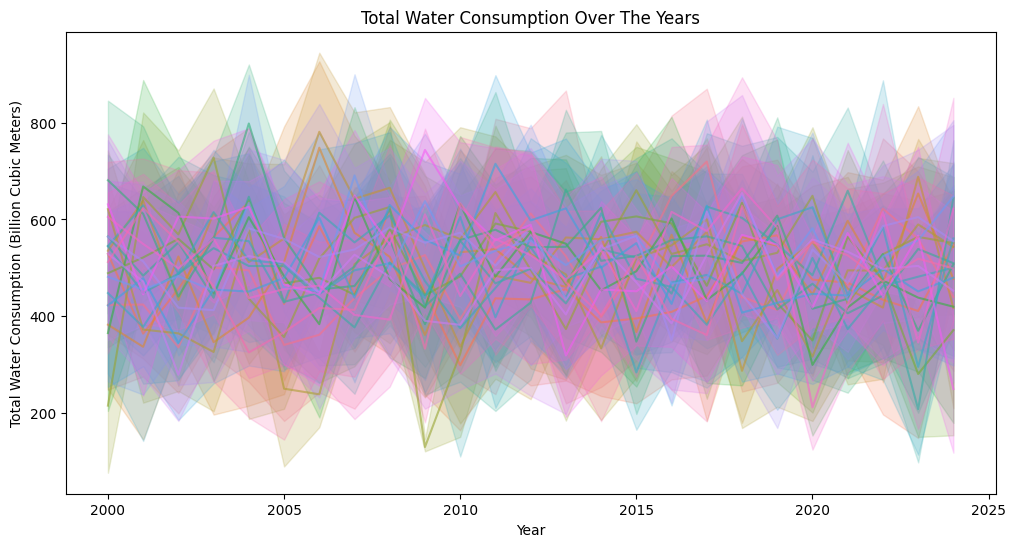

In [5]:
df['Country'] = df['Country'].astype(str)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Water Consumption Trand Over the years
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Year',y='Total Water Consumption (Billion Cubic Meters)', hue='Country', alpha=0.6)
plt.title('Total Water Consumption Over The Years')
plt.xlabel('Year')
plt.ylabel('Total Water Consumption (Billion Cubic Meters)')
plt.legend([], [], frameon=False)
plt.show()



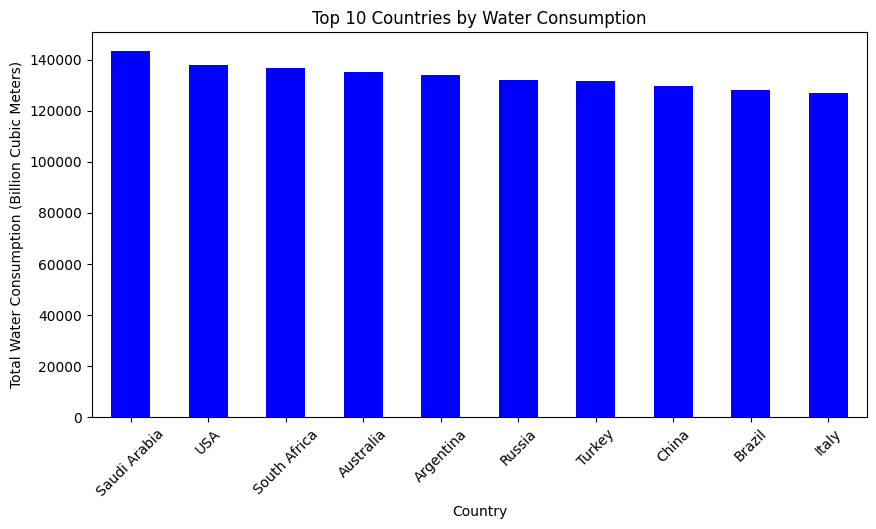

In [7]:
# Top 10 countries with highest water consumption
top_countries = df.groupby("Country")["Total Water Consumption (Billion Cubic Meters)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar', color='blue')
plt.title('Top 10 Countries by Water Consumption')
plt.ylabel('Total Water Consumption (Billion Cubic Meters)')
plt.xticks(rotation=45)
plt.show()

C:\Users\NMH\AppData\Local\Temp\ipykernel_12060\3301969499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Water Scarcity Level', palette='coolwarm')


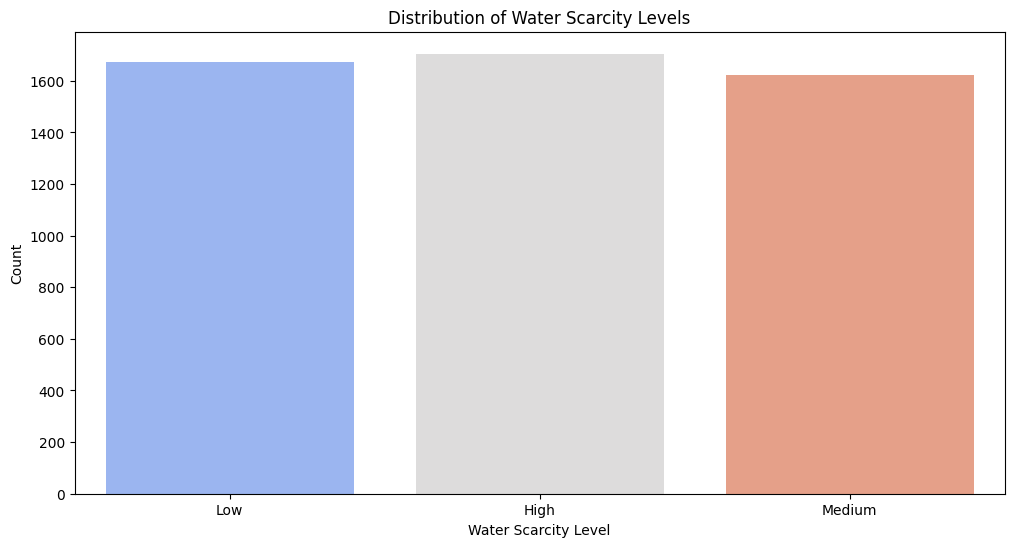

In [8]:
# Water Scarcity Level Distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Water Scarcity Level', palette='coolwarm')
plt.title('Distribution of Water Scarcity Levels')
plt.xlabel('Water Scarcity Level')
plt.ylabel('Count')
plt.show()

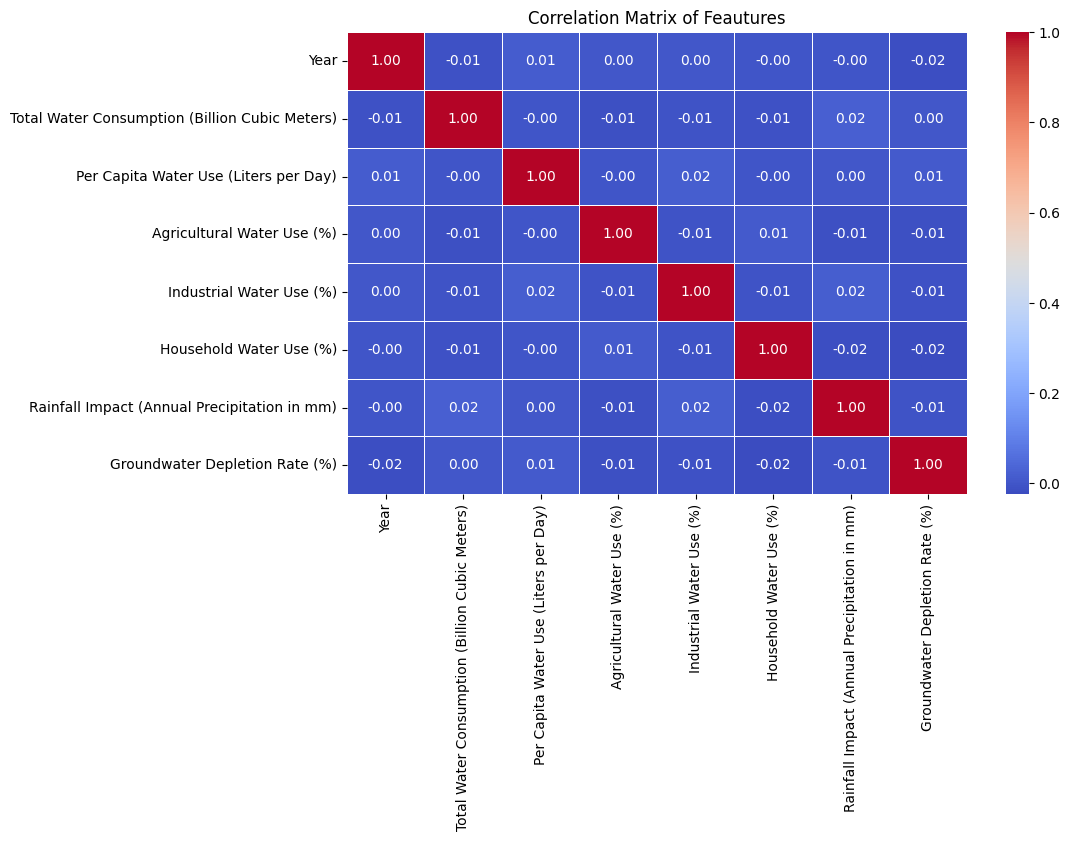

In [9]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Feautures')
plt.show()